In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection
#import lightgbm as lgbm
from sklearn import metrics
#import xgboost as xgb
#from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
display(train, test)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,99.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85457
9701,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,94.0,26.5,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85458
9702,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,94.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85459
9703,7,State_11,Residential,5plus_Unit_Building,25368.0,1992.0,79.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85460


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [8]:
train.describe().round(2)

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.00,75757.00,73920.00,49048.00,75757.00,75757.00,75757.00,75757.00,75757.00,75757.00,...,75757.00,75757.00,75757.00,75757.00,34675.00,33946.00,34675.00,29961.00,75757.00,75757.00
mean,4.37,165983.87,1952.31,61.05,39.51,11.43,34.31,59.05,11.72,35.53,...,82.71,14.06,0.28,0.00,66.55,62.78,4.19,109.14,82.58,37878.00
std,1.47,246875.79,37.05,28.66,60.66,9.38,7.00,5.36,12.58,8.87,...,25.28,10.94,2.25,0.14,131.15,130.31,6.46,50.70,58.26,21869.31
min,1.00,943.00,0.00,0.00,-6.40,-19.00,10.81,42.00,-13.00,13.25,...,0.00,0.00,0.00,0.00,1.00,1.00,1.00,12.00,1.00,0.00
25%,3.00,62379.00,1927.00,40.00,11.90,6.00,29.83,56.00,2.00,31.62,...,72.00,6.00,0.00,0.00,1.00,1.00,1.00,88.00,54.53,18939.00
50%,5.00,91367.00,1951.00,67.00,25.00,11.00,34.45,59.00,9.00,34.11,...,84.00,12.00,0.00,0.00,1.00,1.00,1.00,104.00,75.29,37878.00
75%,6.00,166000.00,1977.00,85.00,42.70,13.00,37.32,62.00,20.00,40.88,...,97.00,17.00,0.00,0.00,1.00,1.00,1.00,131.00,97.28,56817.00
max,6.00,6385382.00,2015.00,100.00,1924.50,49.00,64.76,91.00,48.00,65.11,...,260.00,185.00,119.00,16.00,360.00,360.00,23.30,311.00,997.87,75756.00


In [9]:
num_cols = ['floor_area', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

nominal_cols = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
ordinal_cols = ['year_built', 'energy_star_rating']

In [10]:
def detect_outliers(df, n, features):

     outlier_indices = []
     for col in features:
         Q1 = np.percentile(df[col], 25)
         Q3 = np.percentile(df[col], 75)
         IQR = Q3-Q1

         outlier_list = df[(df[col]<(Q1-(1.5*IQR))) | (df[col]>(Q3+(1.5*IQR)))].index
         outlier_indices.extend(outlier_list)

     outlier_indices = Counter(outlier_indices)
     outliers = (k for k, v in outlier_indices.items() if v>n)
     return outliers

In [11]:
to_drop = detect_outliers(train, 10, num_cols)

In [12]:
train = train.drop(to_drop, axis=0).reset_index(drop=True)

In [13]:
train['days_above_110F'].value_counts()

0    68298
Name: days_above_110F, dtype: int64

In [14]:
test['days_above_110F'].value_counts()

0    9705
Name: days_above_110F, dtype: int64

In [15]:
train.drop(columns=['days_above_110F'], inplace=True)
test.drop(columns=['days_above_110F'], inplace=True)

In [16]:
for col in nominal_cols:
#     print(col)
    encoder = LabelEncoder()
    encoder.fit(train[col])
    train[col] = encoder.transform(train[col])

    for label in np.unique(test[col]):
        if label not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, label)
    test[col] = encoder.transform(test[col])

In [17]:
corr_matrix = train.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col]>0.95)]

In [18]:
train.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    35416
max_wind_speed               34725
days_with_fog                39805
site_eui                         0
id                               0
Length: 63, dtype: int64

In [19]:
test.isna().sum()

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 62, dtype: int64

In [20]:
train.drop(["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"], axis=1, inplace=True)
test.drop(["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"], axis=1, inplace=True)

In [21]:
train['year_built'].isna().sum()

1058

In [22]:
test['year_built'].isna().sum()

92

In [23]:
train = train.dropna(subset=['year_built'])
test = test.dropna(subset=['year_built'])

Text(0.5, 1.0, 'Missing values in test data')

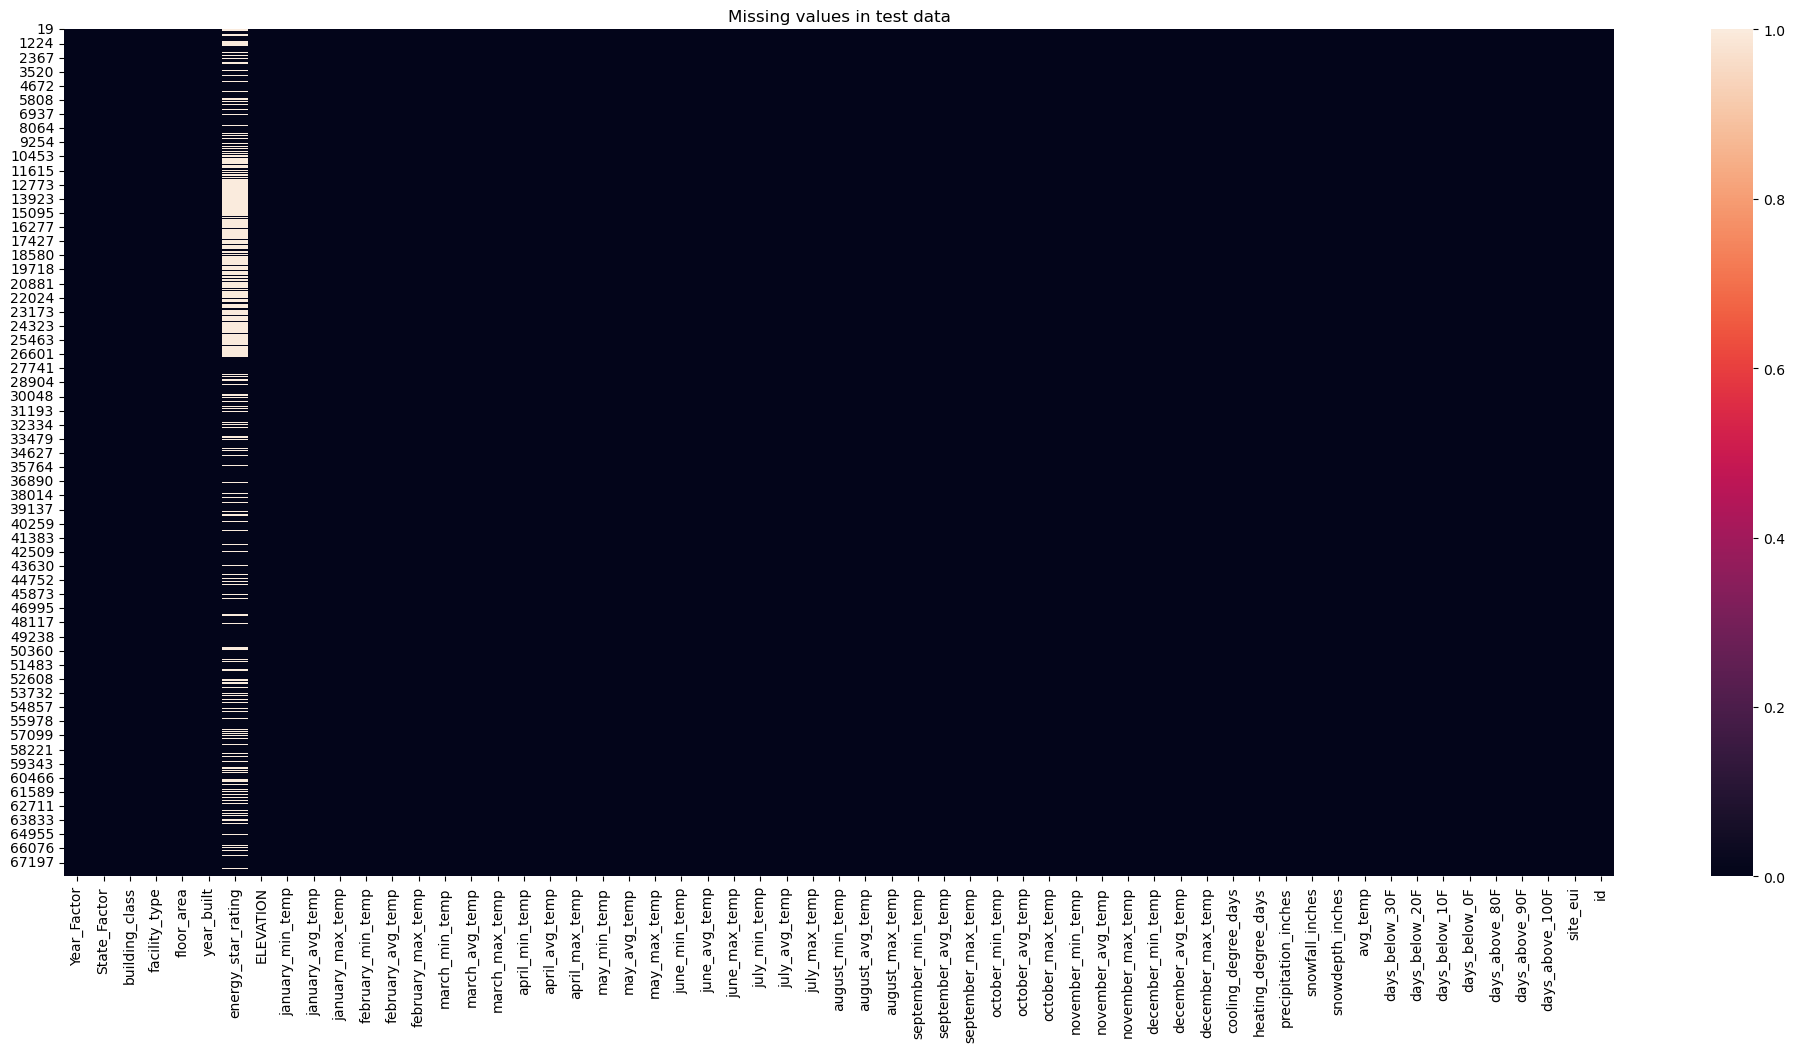

In [24]:
plt.figure(figsize=(25,11))
sns.heatmap(train.isna(),xticklabels = train.columns)
plt.title("Missing values in test data")

In [25]:
from sklearn.impute import KNNImputer

In [26]:
knnimputer = KNNImputer(n_neighbors=7)

In [ ]:
train['energy_star_rating'] = knnimputer.fit_transform(train[['energy_star_rating']])
test['energy_star_rating'] = knnimputer.fit_transform(test[['energy_star_rating']])

In [ ]:
print(train['energy_star_rating'].isna().sum())
print(test['energy_star_rating'].isna().sum())

0
0


Text(0.5, 1.0, 'Missing values in test data')

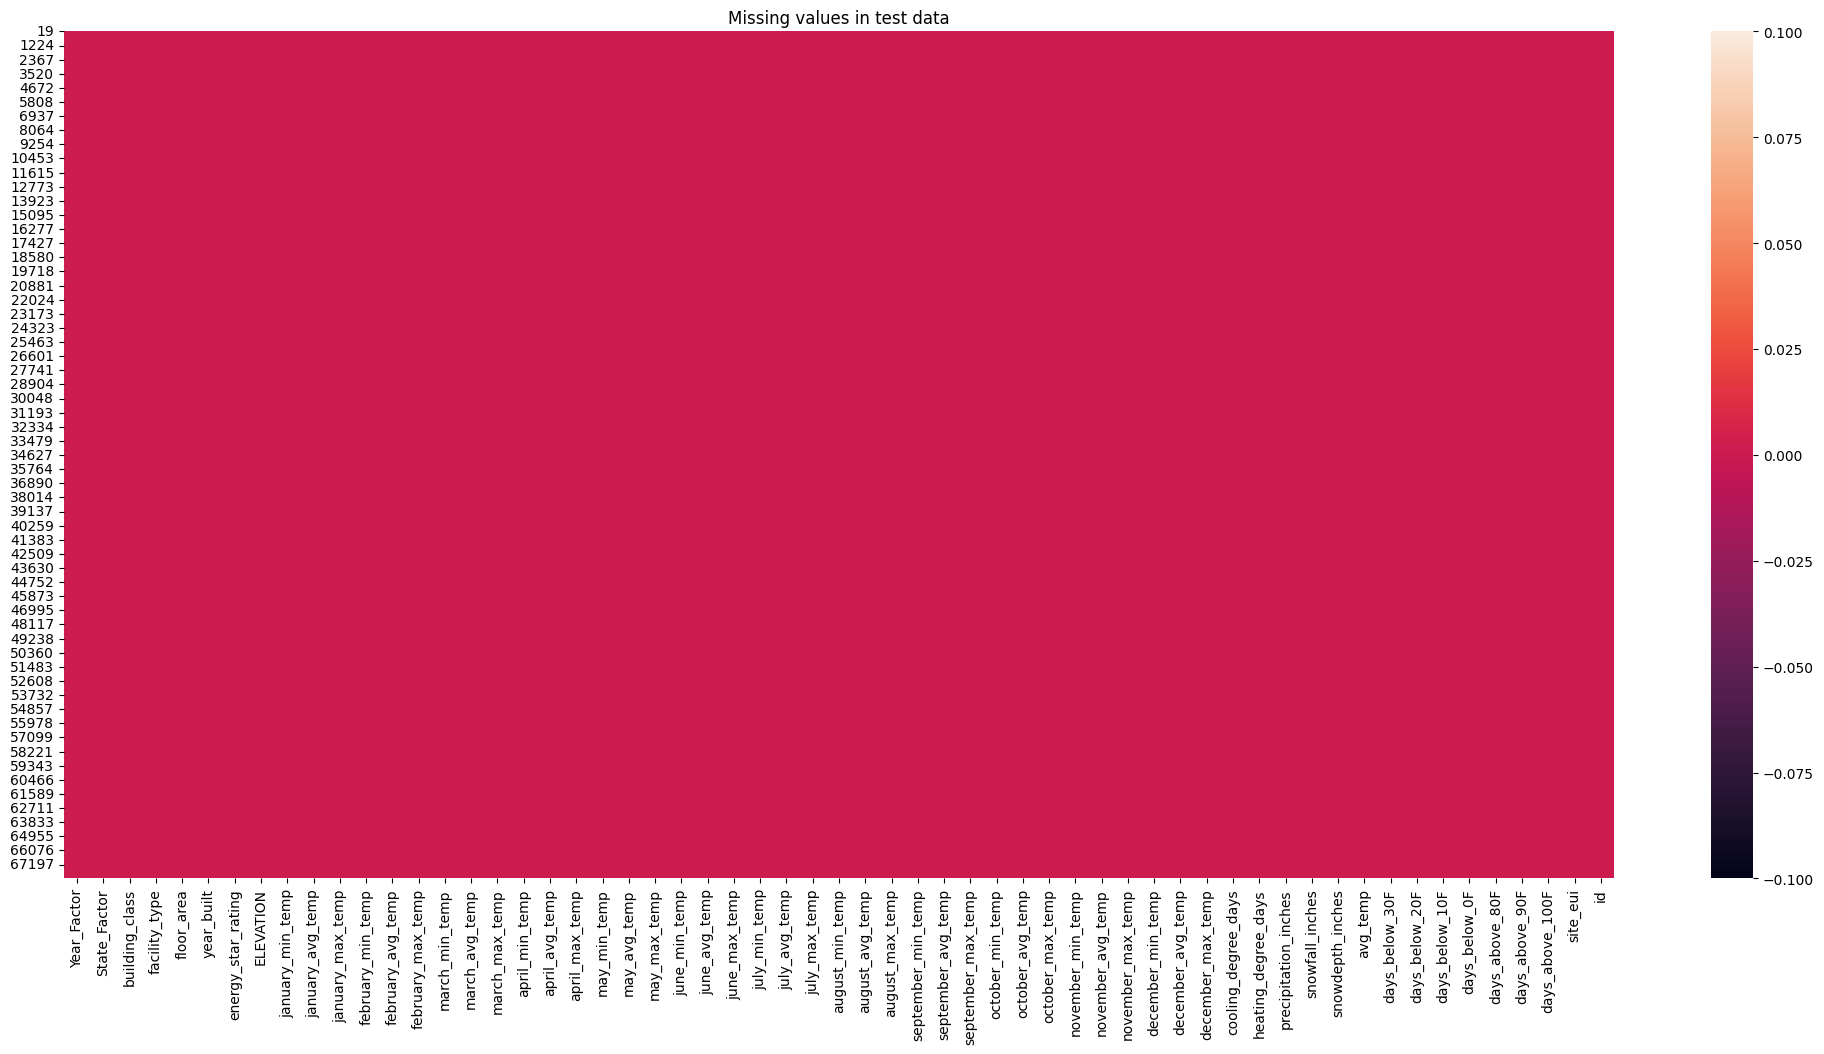

In [ ]:
plt.figure(figsize=(25,11))
sns.heatmap(train.isna(),xticklabels = train.columns)
plt.title("Missing values in test data")

Text(0.5, 1.0, 'Missing values in test data')

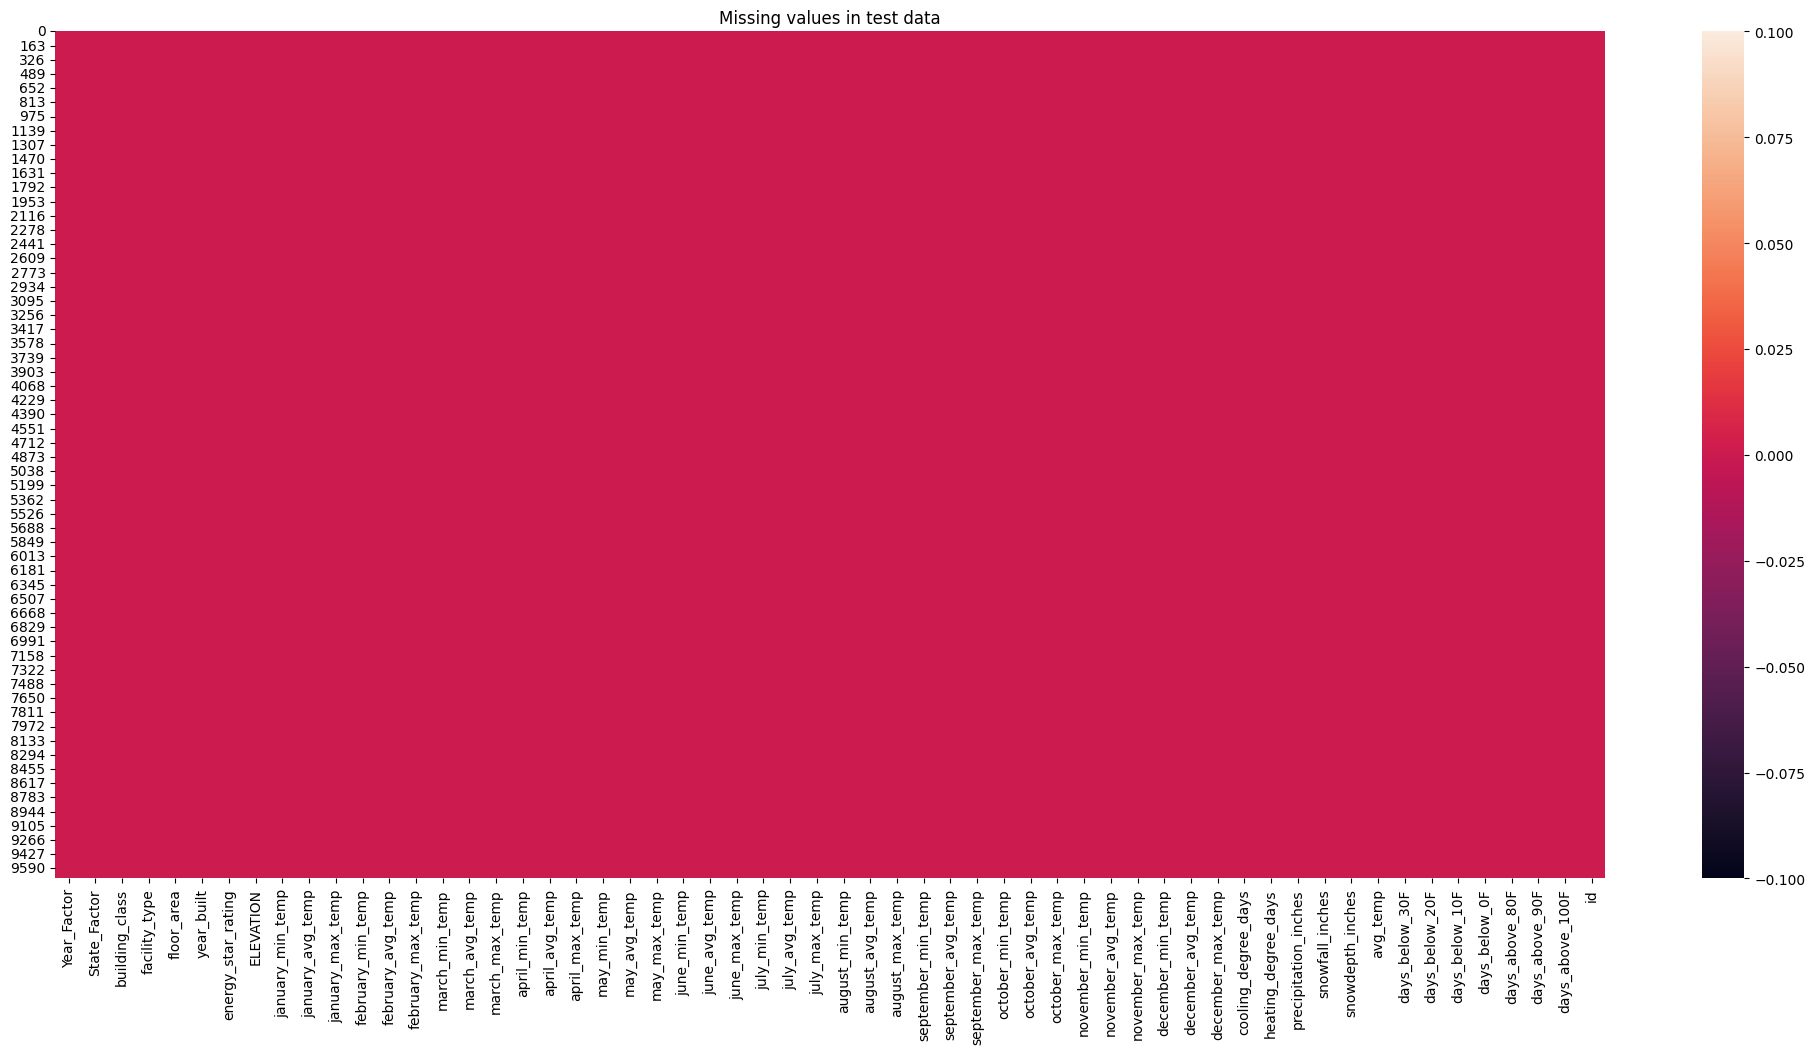

In [ ]:
plt.figure(figsize=(25,11))
sns.heatmap(test.isna(),xticklabels = test.columns)
plt.title("Missing values in test data")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_features = ['State_Factor', 'building_class', 'facility_type']

le = LabelEncoder()

for feature in cat_features:
    train[feature] = le.fit_transform(train[feature])

for feature in cat_features:
    test[feature] = le.fit_transform(test[feature])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train = train.drop(['site_eui','id'], axis=1)
y_train = train['site_eui']

In [ ]:
X_train.shape, y_train.shape

((67240, 57), (67240,))

In [ ]:
X_test = test.drop(['id'], axis=1)

In [ ]:
y_train = y_train.dropna()

In [ ]:
y_train = y_train.fillna(0)

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

models = {'XGB': XGBRegressor(),
          'RFR': RandomForestRegressor(n_estimators=200),
          'ETR': ExtraTreesRegressor(),
          'CBR': CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05, loss_function='RMSE')}

fitted_models = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # No need to dropna() for CatBoost
    y_pred = model.predict(X_test)

    if model_name == 'XGB':
        # Create a DataFrame with the id and site_eui columns
        results = pd.DataFrame({'id': X_test.index, 'site_eui': y_pred})

        # Save the DataFrame to a CSV file
        results.to_csv('submission.csv', index=False)

    print(f"{model_name} predictions: {y_pred}")

    # Save the fitted model to the fitted_models dictionary
    fitted_models[model_name] = model

XGB predictions: [285.96545  186.51367  328.5253   ...  26.027689  43.445     27.198992]
RFR predictions: [308.60915236 296.24931055 412.37891256 ...  38.91452774  32.25745431
  40.51595272]
ETR predictions: [272.32846684 192.41356279 332.41734007 ...  53.77156722  52.99579283
  48.48104133]
0:	learn: 55.4349823	total: 137ms	remaining: 13.6s
1:	learn: 54.5785035	total: 217ms	remaining: 10.6s
2:	learn: 53.8299890	total: 299ms	remaining: 9.68s
3:	learn: 53.1362451	total: 382ms	remaining: 9.17s
4:	learn: 52.6215433	total: 437ms	remaining: 8.29s
5:	learn: 52.1238762	total: 517ms	remaining: 8.1s
6:	learn: 51.7356432	total: 565ms	remaining: 7.5s
7:	learn: 51.1340864	total: 646ms	remaining: 7.43s
8:	learn: 50.6414731	total: 743ms	remaining: 7.51s
9:	learn: 50.2506653	total: 882ms	remaining: 7.93s
10:	learn: 49.9630267	total: 967ms	remaining: 7.82s
11:	learn: 49.5133989	total: 1.09s	remaining: 8.02s
12:	learn: 49.0891910	total: 1.24s	remaining: 8.31s
13:	learn: 48.8185507	total: 1.4s	remaining

In [ ]:
for model_name, fitted_model in fitted_models.items():
    y_pred = fitted_model.predict(X_train)

    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R^2: {r2}")


XGB - MSE: 1033.0516182897081, MAE: 18.163262079894327, R^2: 0.6740752682419602
RFR - MSE: 217.66308987728303, MAE: 7.3530491131615765, R^2: 0.9313279385793627
ETR - MSE: 2.442320368601258, MAE: 0.0785510647850273, R^2: 0.9992294551434696
CBR - MSE: 1690.4006348993378, MAE: 21.324837165297687, R^2: 0.46668359669644244
